  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-e_uq1hmt
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-e_uq1hmt
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
Se cargaron 16 descripciones.
⬆️ Sube tus imágenes para comparar (de 2 a 10)...


Saving perro.webp to perro.webp

🧾 Descripciones más probables para cada imagen:

📷 Imagen: perro.webp
📝 Descripción sugerida por CLIP: 'Mejor amigo del hombre' (similitud: 26.4875)


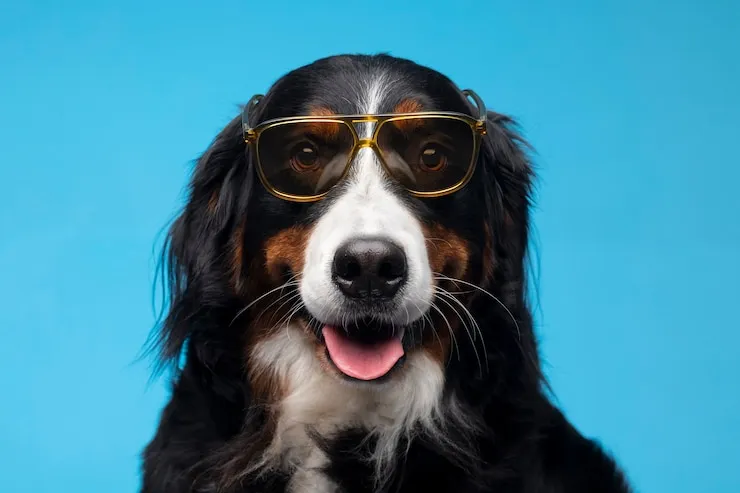

In [7]:
# 📦 INSTALAR DEPENDENCIAS
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git
!pip install Pillow

# 🔧 IMPORTAR LIBRERÍAS
import torch
import clip
from PIL import Image
import os
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
import pandas as pd
from google.colab import files

# 🚀 CARGAR MODELO CLIP
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# 📄 CARGAR DESCRIPCIONES DESDE objetos_corregido.csv
csv_path = "/content/objetos_corregido.csv"  # Asegúrate de subir el archivo a /content
df_descripciones = pd.read_csv(csv_path, encoding="latin1", sep=",")

# ✅ Verifica que esté la columna 'descripcion'
if "descripcion" not in df_descripciones.columns:
    raise ValueError("❌ El archivo no contiene una columna llamada 'descripcion'.")

# ✅ Extraer descripciones para usar con CLIP
descripciones = df_descripciones["descripcion"].dropna().tolist()
print(f"Se cargaron {len(descripciones)} descripciones.")

# 📁 SUBIR IMÁGENES PARA ANALIZAR
print("⬆️ Sube tus imágenes para comparar (de 2 a 10)...")
uploaded_images = files.upload()
image_files = list(uploaded_images.keys())

images = []
image_names = []

# 🖼️ PROCESAR IMÁGENES
for filename in image_files:
    try:
        image = preprocess(Image.open(filename)).unsqueeze(0).to(device)
        images.append(image)
        image_names.append(filename)
    except Exception as e:
        print(f"No se pudo procesar {filename}: {e}")

if len(images) == 0:
    raise ValueError("❌ No se subieron imágenes válidas.")

# ✏️ ENCODAR DESCRIPCIONES
text_tokens = clip.tokenize(descripciones).to(device)
with torch.no_grad():
    text_features = model.encode_text(text_tokens)

# 🔍 COMPARAR CADA IMAGEN CON TODAS LAS DESCRIPCIONES
print("\n🧾 Descripciones más probables para cada imagen:")
for i, image in enumerate(images):
    with torch.no_grad():
        image_features = model.encode_image(image)
        similarities = torch.matmul(image_features, text_features.T)
        best_idx = similarities.argmax().item()
        mejor_descripcion = descripciones[best_idx]
        score = similarities[0][best_idx].item()

    print(f"\n📷 Imagen: {image_names[i]}")
    print(f"📝 Descripción sugerida por CLIP: '{mejor_descripcion}' (similitud: {score:.4f})")
    display(Image.open(image_names[i]))
